In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [100]:
data=pd.read_csv('./Data/second_target.csv')

In [101]:
target=data.iloc[:,:13]
target.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액
0,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100001,한식음식점,316763168
1,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100002,중식음식점,39791852
2,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100003,일식음식점,60325474
3,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100004,양식음식점,199448496
4,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100005,제과점,165688274


In [102]:
feature=data[['시간대_06~11_매출_비율','연령대_20_매출_비율','점포수']]
feature.head()

target=pd.concat([target,feature],axis=1)

### 분기당 매출 금액 이상치 제거하기

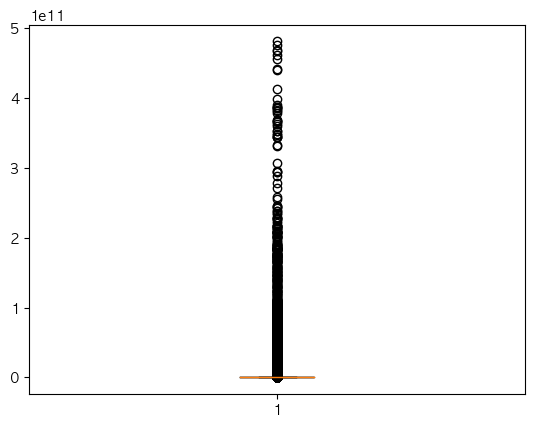

In [103]:
plt.boxplot(
    target['분기당_매출_금액']
)

plt.show()

In [104]:
quant1 =target['분기당_매출_금액'].quantile(0.25)
quant2 =target['분기당_매출_금액'].quantile(0.5)
quant3 =target['분기당_매출_금액'].quantile(0.75)

iqr = quant3 - quant1

min = quant1 - 1.5 * iqr
max = quant3 + 1.5 * iqr

target=target[(target['분기당_매출_금액'] >= min) & (target['분기당_매출_금액'] <= max)]

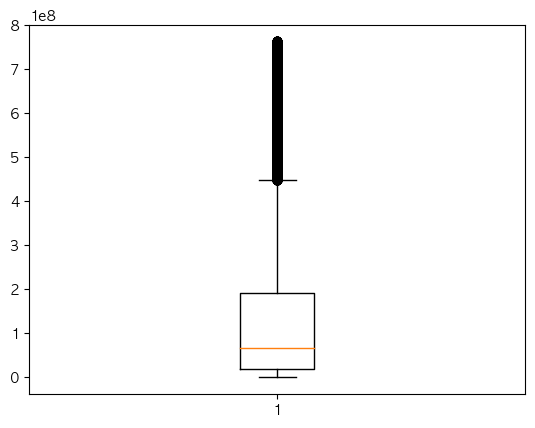

In [105]:
plt.boxplot(
    target['분기당_매출_금액']
)

plt.show()

### 범주형 데이터 의 unique 값이 너무 많기 때문에 클러스터링을 통해 차원 축소를 실행하려고 한다.

### 범주형 데이터 짝짓기
- 상권 구분 + 업종 <br><br>
- 구 + 업종 <br><br>
- 동 + 업종 <br><br>
- 상권명 + 업종 <br><br>

In [106]:
target.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
0,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100001,한식음식점,316763168,2,15,16
1,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100002,중식음식점,39791852,0,33,1
2,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100003,일식음식점,60325474,0,8,2
3,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100004,양식음식점,199448496,0,28,3
4,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100005,제과점,165688274,24,11,4


In [108]:
target.to_csv('./Data/third_target.csv',index=False)

In [109]:
target['서비스_업종_코드_명'].unique()

array(['한식음식점', '중식음식점', '일식음식점', '양식음식점', '제과점', '패스트푸드점', '분식전문점',
       '일반교습학원', '한의원', '미용실', '슈퍼마켓', '편의점', '일반의류', '가방', '시계및귀금속',
       '신발', '커피-음료', '완구', '호프-간이주점', '사진관', '가구', '예술품', '섬유제품',
       '치킨전문점', '문구', '부동산중개업', '서적', '화장품', '여관', '조명용품', '유아의류', '반찬가게',
       '인테리어', '의약품', '육류판매', '스포츠 강습', '치과의원', '당구장', '세탁소', '노래방', '안경',
       '화초', '철물점', '자동차수리', '여행사', '핸드폰', '청과상', '전자상거래업', '악기', '네일숍',
       '스포츠클럽', '고시원', '가전제품', '독서실', '의료기기', '애완동물', '외국어학원', '볼링장',
       '주유소', '미곡판매', '일반의원', '피부관리실', '법무사사무소', '운동/경기용품', 'PC방',
       '골프연습장', '컴퓨터및주변장치판매', '자전거 및 기타운송장비', '변호사사무소', '가전제품수리',
       '세무사사무소', '예술학원', '한복점', '회계사사무소', '통신기기수리', '비디오/서적임대', '자동차미용',
       '수산물판매', '자동차부품', '건축물청소', '중고차판매', '전자게임장'], dtype=object)

### 타켓이 정규분포를 따르는지
- qqplot <br><br>
- shapiro 검정

((array([-4.83977573, -4.66044998, -4.56351231, ...,  4.56351231,
          4.66044998,  4.83977573]),
  array([        8,        17,        35, ..., 762948195, 762960714,
         762962539])),
 (148886422.93860212, 138786413.51443273, 0.8757450562444122))

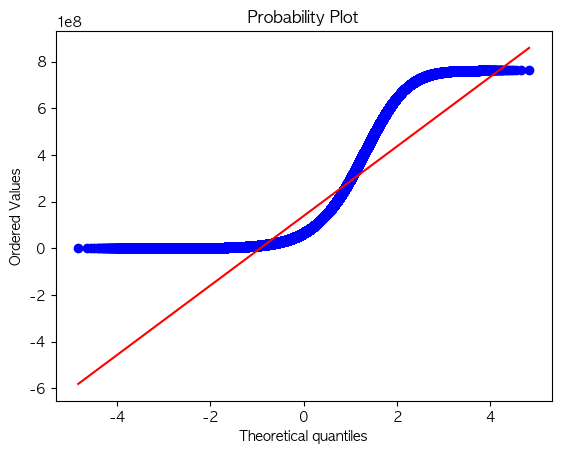

In [110]:
from scipy.stats import probplot

probplot(target['분기당_매출_금액'], plot=plt)

- 요식업만 넣었을 때

In [150]:
target['서비스_업종_코드_명'].unique()

array(['인테리어', '자동차미용', '여행사', '전자상거래업', '스포츠 강습', '일반교습학원', '자동차수리',
       '예술품', '운동/경기용품', '일반의류', '여관', '가전제품수리', '반찬가게', '섬유제품',
       '호프-간이주점', '화장품', '가전제품', '육류판매', '청과상', '의료기기', '의약품', '시계및귀금속',
       '피부관리실', '세탁소', '서적', '독서실', '문구', '고시원', '법무사사무소', '예술학원',
       '스포츠클럽', '화초', '외국어학원', '컴퓨터및주변장치판매', '부동산중개업', '애완동물', '가방', '신발',
       '제과점', '핸드폰', '변호사사무소', '회계사사무소', '치과의원', '철물점', '커피-음료', '수산물판매',
       '미용실', '자전거 및 기타운송장비', '슈퍼마켓', '미곡판매', '네일숍', '조명용품', '가구', '사진관',
       '유아의류', '분식전문점', 'PC방', '중식음식점', '세무사사무소', '한복점', '양식음식점', '당구장',
       '한의원', '패스트푸드점', '치킨전문점', '노래방', '일반의원', '악기', '볼링장', '통신기기수리',
       '한식음식점', '안경', '완구', '일식음식점', '골프연습장', '건축물청소', '편의점', '자동차부품',
       '주유소', '비디오/서적임대', '전자게임장', '중고차판매'], dtype=object)

In [151]:
food=target[target['서비스_업종_코드_명'].isin(
       ['한식음식점', '중식음식점', '일식음식점', '양식음식점',
          '패스트푸드점', '분식전문점',
          '치킨전문점','제과점','호프-간이주점','커피-음료'])]

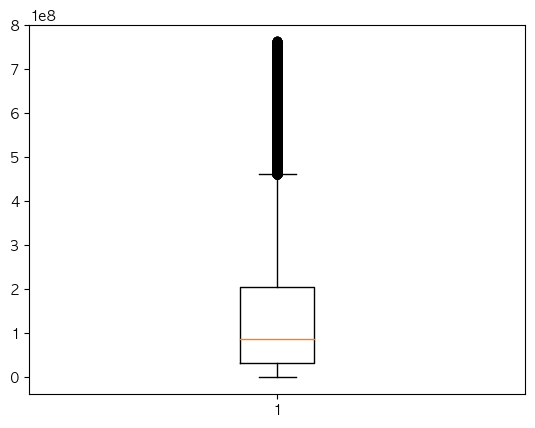

In [152]:
food = food[food['상권_구분_코드_명'] == '골목상권']

plt.boxplot(
    food['분기당_매출_금액']
)

plt.show()

((array([-4.48109706, -4.28804248, -4.18323533, ...,  4.18323533,
          4.28804248,  4.48109706]),
  array([      119,       119,       122, ..., 762925207, 762937987,
         762962539])),
 (146470320.0700503, 149720668.8701039, 0.8921869511953031))

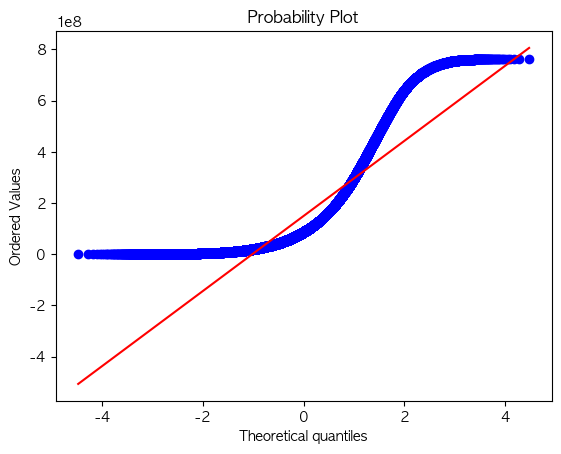

In [153]:
probplot(food['분기당_매출_금액'], plot=plt)

In [120]:
from scipy.stats import shapiro

In [154]:
# 원래
shapiro(target['분기당_매출_금액'])

ShapiroResult(statistic=0.767179548740387, pvalue=0.0)

In [155]:
shapiro(food['분기당_매출_금액'])

ShapiroResult(statistic=0.7959980368614197, pvalue=0.0)

### 매출이 말도 안되게 낮은 놈들 찾기

In [157]:
food=food.sort_values(by='분기당_매출_금액')

In [161]:
food.head(50)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
490022,2016,3,A,골목상권,11380,은평구,11380640,증산동,1000426,증산로5길,CS100009,호프-간이주점,119,0,0,1
490154,2018,1,A,골목상권,11380,은평구,11380640,증산동,1000426,증산로5길,CS100009,호프-간이주점,119,0,0,1
489963,2015,4,A,골목상권,11380,은평구,11380640,증산동,1000426,증산로5길,CS100009,호프-간이주점,122,0,100,1
489854,2014,3,A,골목상권,11380,은평구,11380640,증산동,1000426,증산로5길,CS100009,호프-간이주점,126,0,0,1
960476,2014,2,A,골목상권,11650,서초구,11650510,서초1동,1000850,남부순환로339길,CS100005,제과점,917,100,0,1
766466,2019,1,A,골목상권,11560,영등포구,11560605,문래동,1000684,경인로77길,CS100010,커피-음료,1632,0,100,10
714005,2014,4,A,골목상권,11530,구로구,11530595,가리봉동,1000651,우마길,CS100010,커피-음료,4263,0,0,0
796777,2016,3,A,골목상권,11560,영등포구,11560670,신길5동,1000714,신길로17길,CS100008,분식전문점,9271,0,0,1
855040,2016,3,A,골목상권,11590,동작구,11590530,상도1동,1000758,상도로37길,CS100005,제과점,10656,0,0,2
243856,2014,3,A,골목상권,11230,동대문구,11230660,장안2동,1000200,장한로27길,CS100008,분식전문점,12430,0,0,0


In [162]:
food.tail(50)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
393504,2017,4,A,골목상권,11305,강북구,11305575,삼각산동,1000330,삼양로27길,CS100001,한식음식점,761376852,2,10,9
622065,2021,2,A,골목상권,11470,양천구,11470620,신정1동,1000544,중앙로36길,CS100001,한식음식점,761393199,1,7,13
1198670,2015,3,A,골목상권,11740,강동구,11740580,암사2동,1000981,상암로5길,CS100005,제과점,761417621,17,17,6
418311,2014,4,A,골목상권,11320,도봉구,11320511,창1동,1000360,도봉로114길,CS100005,제과점,761475851,14,22,7
219492,2019,2,A,골목상권,11215,광진구,11215770,중곡4동,1000161,자양로45길,CS100001,한식음식점,761515246,2,18,24
944740,2018,3,A,골목상권,11650,서초구,11650652,양재2동,1000859,마방로2길,CS100010,커피-음료,761540567,19,29,9
950196,2020,1,A,골목상권,11650,서초구,11650581,반포4동,1000855,동광로39길,CS100005,제과점,761557890,10,14,6
830969,2016,3,A,골목상권,11590,동작구,11590660,대방동,1000774,여의대방로46길,CS100001,한식음식점,761568361,2,10,6
75736,2020,1,A,골목상권,11140,중구,11140540,회현동,1000048,퇴계로8길,CS100001,한식음식점,761570790,2,10,20
542639,2014,3,A,골목상권,11440,마포구,11440660,서교동,1000504,월드컵로8길,CS100003,일식음식점,761610588,0,28,7
